 This is a supervised ML project, because there are labelled dataset to train
 algorithms that predict outcome accurately.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Importing our dataset 

In [2]:
df = pd.read_csv(r'C:\Users\MY PC\Documents\Data Frame\insurance.csv')

In [3]:
df.head() #Printing the first five observations of the dataset

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Getting information about our dataset. There are no missing values in our
# dataset, following our output from df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape # Getting the dimension of our dataframe.

(1338, 7)

# Getting the sum of null values in the dataset

In [6]:
df.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# This describes the numerical variables of our dataset
# . The mean and the median of the variables are not so different, and it can be conclude that the outliers have no significant effect on our data

In [8]:
df['sex'].value_counts(normalize=True)*100 

male      50.523169
female    49.476831
Name: sex, dtype: float64

# There are more males than females in our survey. Although , the difference is not so significant 

In [9]:
df['smoker'].value_counts(normalize=True)*100

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

# There are less smokers than others who are not smokers. 20% are smokers and 79.5% are not smokers.

In [10]:
df['region'].value_counts(normalize=True)*100

southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64

. People from the south-eastern region dominate the survey. The have a percentage of 27.204%, which is the highest

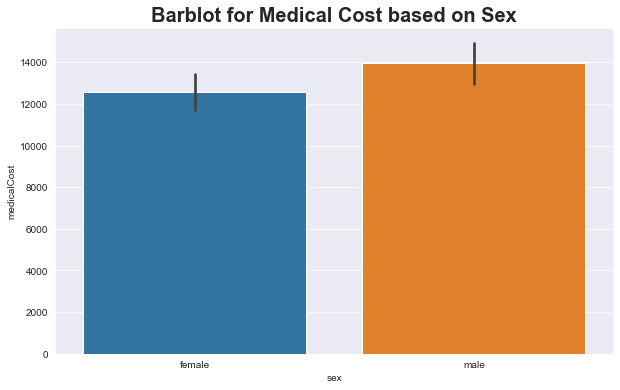

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x= df['sex'],y=df['medicalCost'],data=df);
plt.title('Barblot for Medical Cost based on Sex',fontweight='bold',fontsize=20);

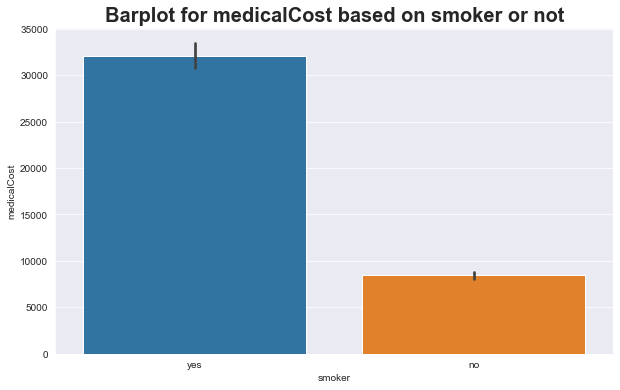

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['smoker'],y=df['medicalCost'],data=df);
plt.title('Barplot for medicalCost based on smoker or not',fontweight='bold',fontsize=20);

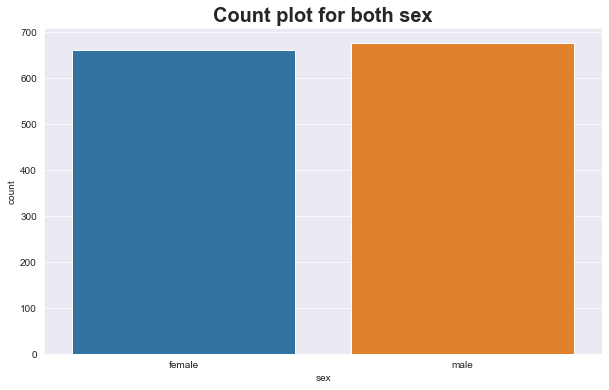

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x= df['sex'],data=df);
plt.title('Count plot for both sex',fontweight='bold',fontsize=20);

Percentage of males and females are almost the same, but there are more males than females 

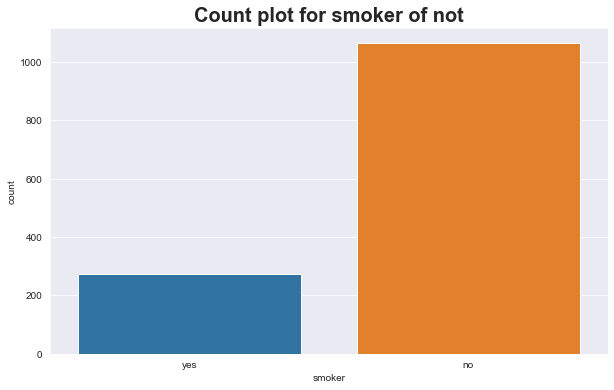

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x= df['smoker'],data=df);
plt.title('Count plot for smoker of not',fontweight='bold',fontsize=20);

The above chart shows that there are less smokers than people who are not smokers. In other words larger percentage of the people are not smokers

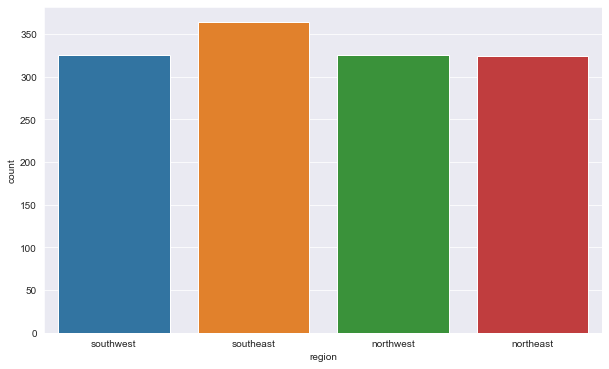

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['region'],data=df);

People from the south-east are more than other people other regions. It can be observed from the chart above

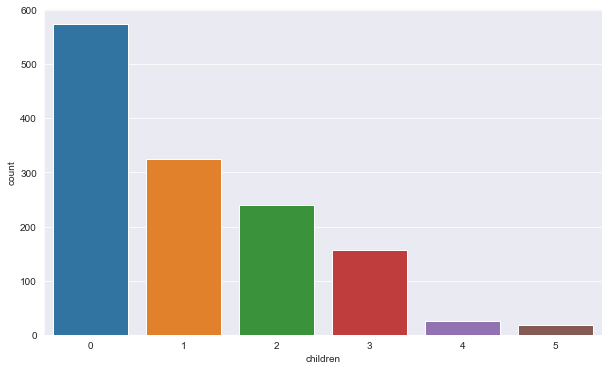

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['children'],data=df);

Larger percentage of people who took part in this survey have no children at all, while least of the people have 5 children.

In [17]:
df[df['children']==0].iloc[0:50]
# Majority of the people in this category(that have no children)
#are not smokers , and definitely have lesser medical cost to pay.

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
9,60,female,25.840,0,no,northwest,28923.13692
10,25,male,26.220,0,no,northeast,2721.32080
11,62,female,26.290,0,yes,southeast,27808.72510
12,23,male,34.400,0,no,southwest,1826.84300
13,56,female,39.820,0,no,southeast,11090.71780
14,27,male,42.130,0,yes,southeast,39611.75770


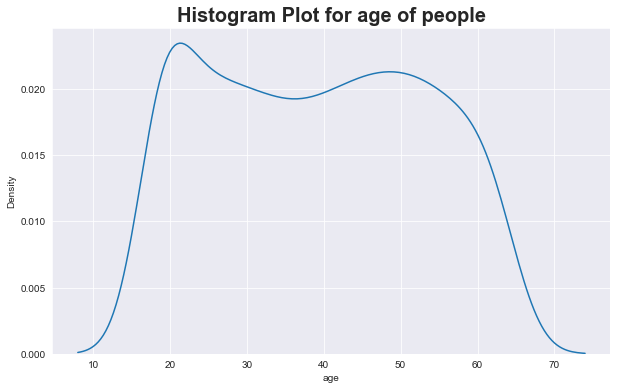

In [18]:
plt.figure(figsize=(10,6));
sns.kdeplot(x=df['age']);
plt.title('Histogram Plot for age of people',fontweight='bold',fontsize=20);

People's age group is  skewed to the right. The modal age class is 18 years old

In [19]:
df['age'].mode()

0    18
dtype: int64

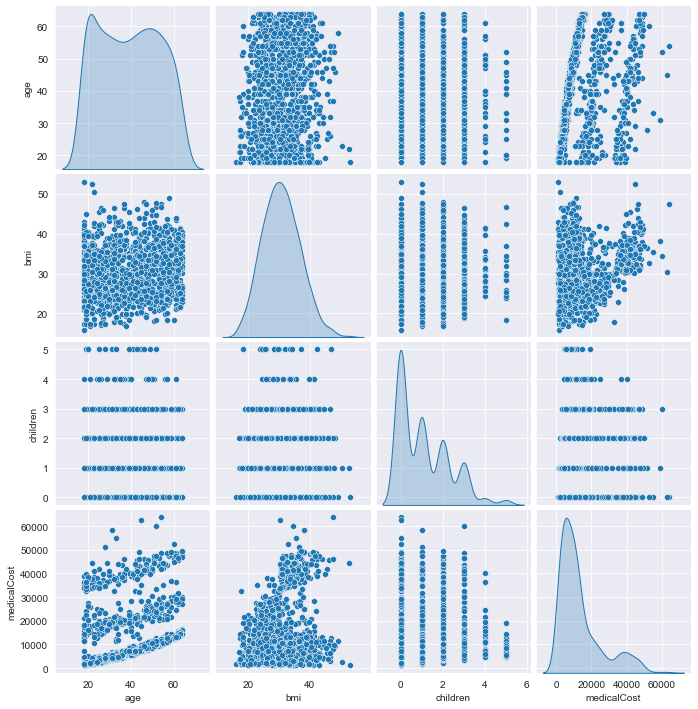

In [20]:
sns.pairplot(data=df,diag_kind='kde');

#This ia a pairplot to show the relationship between each numerical variable. Age and Medical cost are positively correlated and only the bmi is normally distributed. All other numerical variables are skewed

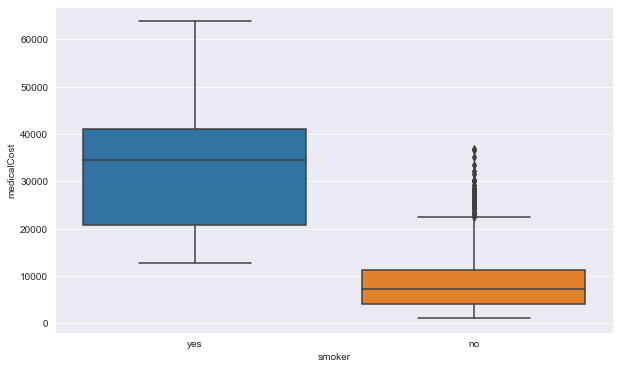

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['smoker'],y=df['medicalCost'],data=df);

Smokers have to pay higher than people who are not smokers. This can be observed from the above boxplot

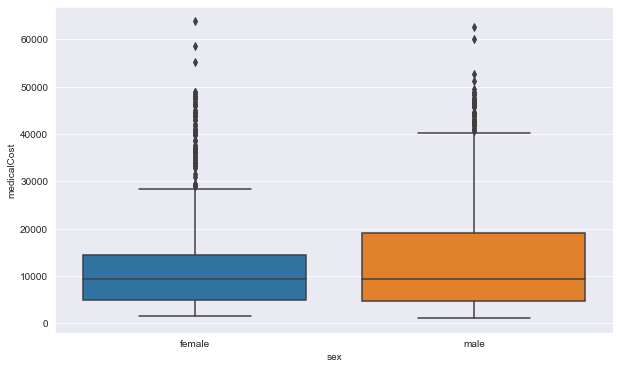

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['sex'],y=df['medicalCost'],data=df);

There are less female smokers than male. However, males paid more medical cost than females

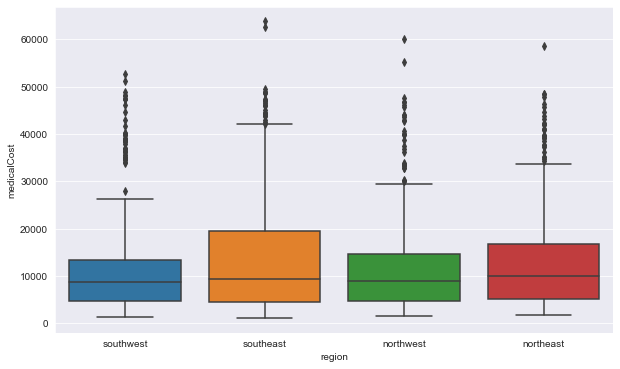

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['region'],y=df['medicalCost'],data=df);

The above plot shows that people across all regions paid fairly equal medical charges. Although,people from the south-east paid more than people from other regions.

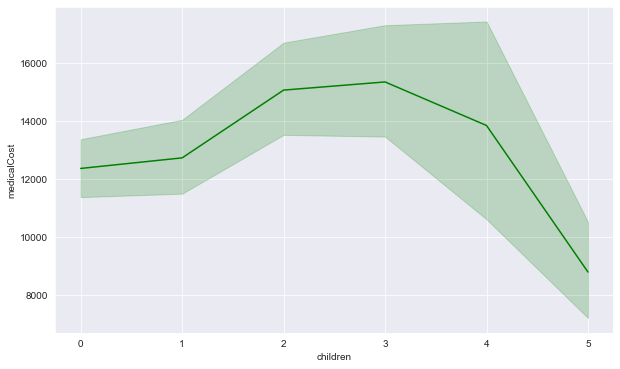

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['children'],y= df['medicalCost'],data=df,color='green');

This plot shows that people that have 2 to 3 children paid more for medical cost 

In [25]:
df.corr()

,age,bmi,children,medicalCost
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
medicalCost,0.299008,0.198341,0.067998,1.000000


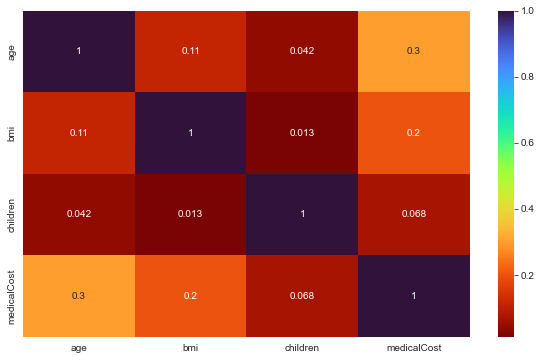

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='turbo_r',annot=True)
plt.show()

#Encoding the categorical variables for proper recognition by our model

In [27]:
region = pd.get_dummies(df['region'],prefix='location')
df = pd.concat([df,region],axis=1)
df.drop(columns='region',inplace=True)

In [28]:
df.head()

,age,sex,bmi,children,smoker,medicalCost,location_northeast,location_northwest,location_southeast,location_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


In [29]:
df['smoker'].replace(to_replace=['yes','no'],value=[1,0],inplace=True)
df['sex'].replace(to_replace=['male','female'],value=[1,0],inplace=True)
df.head()

,age,sex,bmi,children,smoker,medicalCost,location_northeast,location_northwest,location_southeast,location_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [30]:
y = df['medicalCost'].values
X = df[['age','bmi','smoker','children','location_northeast','location_northwest','location_southeast','location_southwest']]

In [31]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [35]:
regressor = LinearRegression()
regressor

LinearRegression()

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)
y_pred[0:20]

array([ 9219.51417339,  7162.61230659, 37239.2206915 ,  9708.55329402,
       27195.92070025, 10808.27174154,   326.02706737, 16975.18449162,
        1370.13152219, 11439.14047182, 28505.53635893,  9533.71740636,
        5376.27663145, 38630.45944324, 40464.32394302, 37342.01928745,
       15242.22722623, 36149.96977324,  9287.52622898, 31792.41771647])

In [38]:
mse= mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)

print('The mean sqaured error is:',mse)
print('The root mean sqaured error is:',rmse)

The mean sqaured error is: 33618622.10413651
The root mean sqaured error is: 5798.15678505993


In [39]:
r2_score(y_test,y_pred)

0.783453160736982

In [40]:
dregressor = DecisionTreeRegressor()
dregressor

DecisionTreeRegressor()

In [41]:
dregressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
y_hat= dregressor.predict(X_test)
y_hat[0:20]

array([ 9500.57305,  5028.1466 , 28950.4692 ,  9225.2564 , 34303.1672 ,
       11326.71487,  2103.08   , 14692.66935,  5458.04645, 10493.9458 ,
       17663.1442 ,  6600.361  ,  4040.55825, 46200.9851 , 48970.2476 ,
       48885.13561,  9304.7019 , 42211.1382 , 28340.18885, 21348.706  ])

In [43]:
mse= mean_squared_error(y_test,y_hat)
rmse = mean_squared_error(y_test,y_hat,squared=False)

print('The mean sqaured error is:',mse)
print('The root mean sqaured error is:',rmse)

The mean sqaured error is: 31732075.641196106
The root mean sqaured error is: 5633.123080600681


In [44]:
r2_score(y_test,y_hat)

0.7956049280642428

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
r_regressor = RandomForestRegressor()
r_regressor

RandomForestRegressor()

In [47]:
r_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
y_rand = r_regressor.predict(X_test)
y_rand[0:20]

array([ 9834.5159143,  7059.6455473, 28123.230407 , 13777.607328 ,
       34336.3475353,  6648.8531433,  1951.9541475, 14354.8718015,
        4892.2143438, 12030.7475217, 18420.4652392,  7453.5784235,
        4967.1383858, 46026.518614 , 48570.1925799, 45780.8990838,
       10900.8608387, 42419.6285066, 14857.672783 , 23651.7101227])

In [49]:
r2_score(y_test,y_rand)

0.8688364727567095

In [50]:
mse= mean_squared_error(y_test,y_rand)
rmse = mean_squared_error(y_test,y_rand,squared=False)

print('The mean sqaured error is:',mse)
print('The root mean sqaured error is:',rmse)

The mean sqaured error is: 20362971.22250752
The root mean sqaured error is: 4512.534899865875


#Let's find a way to better reduce the Mean square error and the root mean sqaure errors

In [51]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [52]:
import xgboost
from xgboost import XGBRegressor

In [53]:
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [54]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [55]:
xregressor= model.predict(X_test)
xregressor[0:20]

array([13004.514 ,  5150.927 , 34483.17  , 11684.008 , 34552.383 ,
        5492.5728,  2027.2776, 14049.742 ,  4559.2236, 12951.251 ,
       17498.559 ,  7906.0894,  4216.0483, 45032.44  , 47411.605 ,
       47988.973 , 10591.177 , 43188.73  , 15580.621 , 21540.74  ],
      dtype=float32)

In [56]:
print('The R squared is:', r2_score(y_test,xregressor)*100)

The R squared is: 86.2002510431567


In [57]:
mse= mean_squared_error(y_test,xregressor)
rmse = mean_squared_error(y_test,xregressor,squared=False)

print('The mean sqaured error is:',mse)
print('The root mean sqaured error is:',rmse)

The mean sqaured error is: 21423935.20454847
The root mean sqaured error is: 4628.599702345026


In [58]:
from sklearn.cluster import KMeans

# Checking for the optimum numbers of clusters

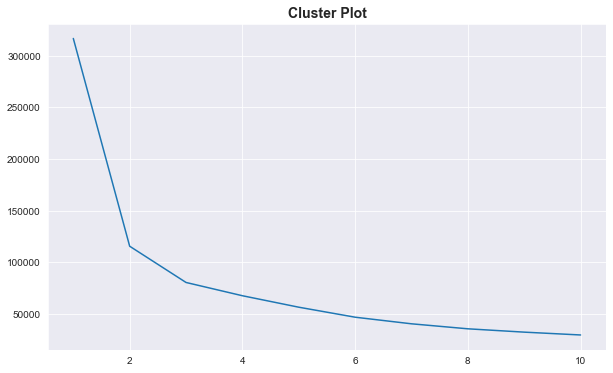

In [59]:
plt.figure(figsize=(10,6))

wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Cluster Plot',fontweight='bold',fontsize=14)
plt.show()

Using the elblow rule, the maximum number of clusters is 2

In [60]:
features = ['age','bmi','smoker','children',
            'location_northeast','location_northwest',
            'location_southeast','location_southwest']
kmeans = KMeans(n_clusters=2)
val_predict= kmeans.fit_predict(df[features])
val_predict

array([1, 1, 1, ..., 1, 1, 0])

In [61]:
df['clust_type'] = val_predict
df.head()

,age,sex,bmi,children,smoker,medicalCost,location_northeast,location_northwest,location_southeast,location_southwest,clust_type
0,19,0,27.900,0,1,16884.92400,0,0,0,1,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0,0,1
4,32,1,28.880,0,0,3866.85520,0,1,0,0,1
